In [1]:
# create a workflow which generate a blog for a given topic

In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_groq import ChatGroq
from IPython.display import Image
import os
from dotenv import load_dotenv

load_dotenv()


In [ ]:
model = ChatGroq(api_key=os.getenv('GROK_API_KEY'),model=os.getenv('MODEL_NAME'),max_completion_tokens=500,verbose=True)

/home/nilesh/miniconda3/envs/langchain_learning/lib/python3.10/site-packages/pydantic/main.py:250: UserWarning: WARNING! max_completion_tokens is not default parameter.
                    max_completion_tokens was transferred to model_kwargs.
                    Please confirm that max_completion_tokens is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [20]:
# define the state
class BlogState(TypedDict):
    topic: str
    outline: str
    content:str
    rate: int

In [21]:
def create_outline(state:BlogState)->BlogState:
    # fetch the topic
    topic = state['topic'
                  ]
    # generate the outline
    outline = model.invoke(input=f"write a blog outline for {topic}").content

    # return the state
    state['outline'] = outline
    return state

def generate_content(state:BlogState)->BlogState:
    # fetch the outline
    outline = state['outline']
    # generate the content
    content = model.invoke(input=f"write a blog for {outline}").content

    # return the state
    state['content'] = content
    return state

# add one more node to rate the content based on outline

def rate_content(state:BlogState)->BlogState:
    outline = state['outline']
    content = state['content']

    # rate the content
    rate = model.invoke(input=f"rate the content:\n{content} \n\n for the outline:\n {outline}. out of 10").content

    # return the state
    state['rate'] = rate
    return state

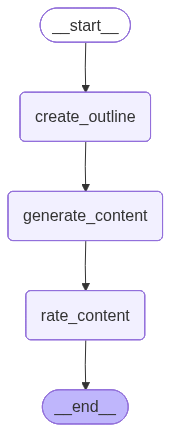

In [22]:
# define the graph
graph = StateGraph(BlogState)

# add the nodes
graph.add_node("create_outline",create_outline)
graph.add_node("generate_content",generate_content)
graph.add_node("rate_content",rate_content)

# add the edges
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","generate_content")
graph.add_edge("generate_content","rate_content")
graph.add_edge("rate_content",END)
# compile the graph

workflow = graph.compile()

# print the workflow
Image(workflow.get_graph().draw_mermaid_png())


In [23]:
initial_state = {"topic": "Artificial Intelligence"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'topic': 'Artificial Intelligence', 'outline': 'Here is a suggested outline for a blog on Artificial Intelligence:\n\n**Title:** "The Future of Intelligence: Understanding Artificial Intelligence"\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI)\n* Importance of AI in today\'s world\n* Thesis statement: AI is revolutionizing various industries and aspects of our lives, and its potential is vast and exciting.\n\n**II. What is Artificial Intelligence?**\n\n* Definition of AI\n* History of AI development\n* Types of AI: Narrow or Weak AI, General or Strong AI, and Superintelligence\n* Key concepts: machine learning, deep learning, natural language processing, and computer vision\n\n**III. Applications of Artificial Intelligence**\n\n* Industries that use AI: healthcare, finance, transportation, education, and customer service\n* Examples of AI in everyday life: virtual assistants, image recognition, speech recognition, and predictive maintenance\n* Emerging tren

In [24]:
print(final_state['outline'])

Here is a suggested outline for a blog on Artificial Intelligence:

**Title:** "The Future of Intelligence: Understanding Artificial Intelligence"

**I. Introduction**

* Brief overview of Artificial Intelligence (AI)
* Importance of AI in today's world
* Thesis statement: AI is revolutionizing various industries and aspects of our lives, and its potential is vast and exciting.

**II. What is Artificial Intelligence?**

* Definition of AI
* History of AI development
* Types of AI: Narrow or Weak AI, General or Strong AI, and Superintelligence
* Key concepts: machine learning, deep learning, natural language processing, and computer vision

**III. Applications of Artificial Intelligence**

* Industries that use AI: healthcare, finance, transportation, education, and customer service
* Examples of AI in everyday life: virtual assistants, image recognition, speech recognition, and predictive maintenance
* Emerging trends: AI in robotics, AI in cybersecurity, and AI in environmental sustai

In [25]:
print(final_state['content'])

**The Future of Intelligence: Understanding Artificial Intelligence**

In today's world, technology is advancing at an unprecedented rate, and one of the most significant innovations is Artificial Intelligence (AI). AI is revolutionizing various industries and aspects of our lives, and its potential is vast and exciting. From virtual assistants to self-driving cars, AI is transforming the way we live, work, and interact with each other. In this blog, we will delve into the world of AI, exploring its definition, applications, benefits, challenges, and future prospects.

**What is Artificial Intelligence?**

Artificial Intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. The history of AI development dates back to the 1950s, when computer scientists like Alan Turing and Marvin Minsky began exploring the possibilities of machine intelligence. Over the years, AI h

In [26]:
print(final_state['rate'])

I would rate the content an 8 out of 10. Here's a breakdown of the strengths and weaknesses:

**Strengths:**

1. **Comprehensive outline**: The provided outline is detailed and covers all the essential aspects of Artificial Intelligence, making it a great starting point for a blog.
2. **Clear structure**: The content is well-organized, and the sections flow logically, making it easy to follow.
3. **Good balance of technical and non-technical information**: The text explains complex AI concepts in an accessible way, making it suitable for both technical and non-technical readers.
4. **Relevant examples and applications**: The content provides concrete examples of AI applications in various industries, which helps to illustrate the technology's potential and relevance.

**Weaknesses:**

1. **Lack of depth in some areas**: Some sections, such as the history of AI development, are brief and could be expanded upon.
2. **No critical analysis or unique perspectives**: The content primarily pr